# 1. Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Importing the Dataset

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# 3. Taking Care of Missing Values

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 4. Taking Care of Duplicate Values

In [4]:
data_dup = data.duplicated().any()

In [5]:
data_dup

True

In [6]:
data = data.drop_duplicates()
data_dup

True

# 5. Data Processing

In [7]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [8]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [9]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# 6. Encoding Categorical Data

In [10]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [11]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [12]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [13]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# 7. Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [16]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# 8. Splitting The Dataset Into The Training Set And Test Set

In [17]:
X = data.drop('target',axis=1)
X.head(10)

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5,0.396267,0,-1.802334,0.029032,-1.205722,-0.037124,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
6,0.396267,1,-1.003898,1.383842,-0.418513,2.895104,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
7,0.064151,1,1.619532,0.822564,-0.199843,-0.209608,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
8,-0.932199,1,-0.661712,0.048386,-0.243577,-0.209608,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,-0.046555,1,-0.547650,0.764500,-1.468126,1.860200,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0


In [18]:
y = data['target']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=0)

# 9. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred1 = log.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test,y_pred1)

0.8688524590163934

# 10. Support Vector Classifier

In [26]:
from sklearn import svm

In [27]:
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [28]:
y_pred2 = svm.predict(X_test)
accuracy_score(y_test,y_pred2)

0.7868852459016393

# 11. K-Nearest Neighbours

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 27)
knn.fit(X_train, y_train)

y_pred3 = knn.predict(X_test)
accuracy_score(y_test, y_pred3)

C:\Users\91906\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8032786885245902

# Non-Linear ML Algorithms

In [30]:
data = pd.read_csv('heart.csv')
data = data.drop_duplicates()
X = data.drop('target',axis=1)
y=data['target']

In [31]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=0)

# 12. Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
y_pred4= dt.predict(X_test)
accuracy_score(y_test,y_pred4)

0.8032786885245902

# 13. Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
y_pred5= rf.predict(X_test)
accuracy_score(y_test,y_pred5)

0.7868852459016393

# 14. Gradient Boosting Classifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [37]:
y_pred6 = gbc.predict(X_test)
accuracy_score(y_test,y_pred6)

0.7049180327868853

In [38]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                 accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})

In [39]:
final_data

,Models,ACC
0,LR,86.885246
1,SVM,78.688525
2,KNN,80.327869
3,DT,80.327869
4,RF,78.688525
5,GB,70.491803


C:\Users\91906\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

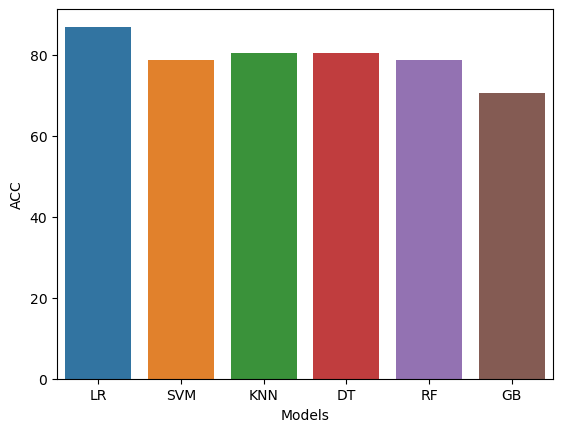

In [40]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [41]:
X=data.drop('target',axis=1)
y=data['target']

In [42]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X,y)

C:\Users\91906\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# 15. Confusion Matrices of Models

In [43]:
#Measuring Accuracy using confusion matrix for all the algorithms 
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_pred1)
cm_svm = confusion_matrix(y_test,y_pred2)
cm_knn = confusion_matrix(y_test,y_pred3)
cm_dt = confusion_matrix(y_test,y_pred4)
cm_rf = confusion_matrix(y_test,y_pred5)
cm_gb = confusion_matrix(y_test,y_pred6)

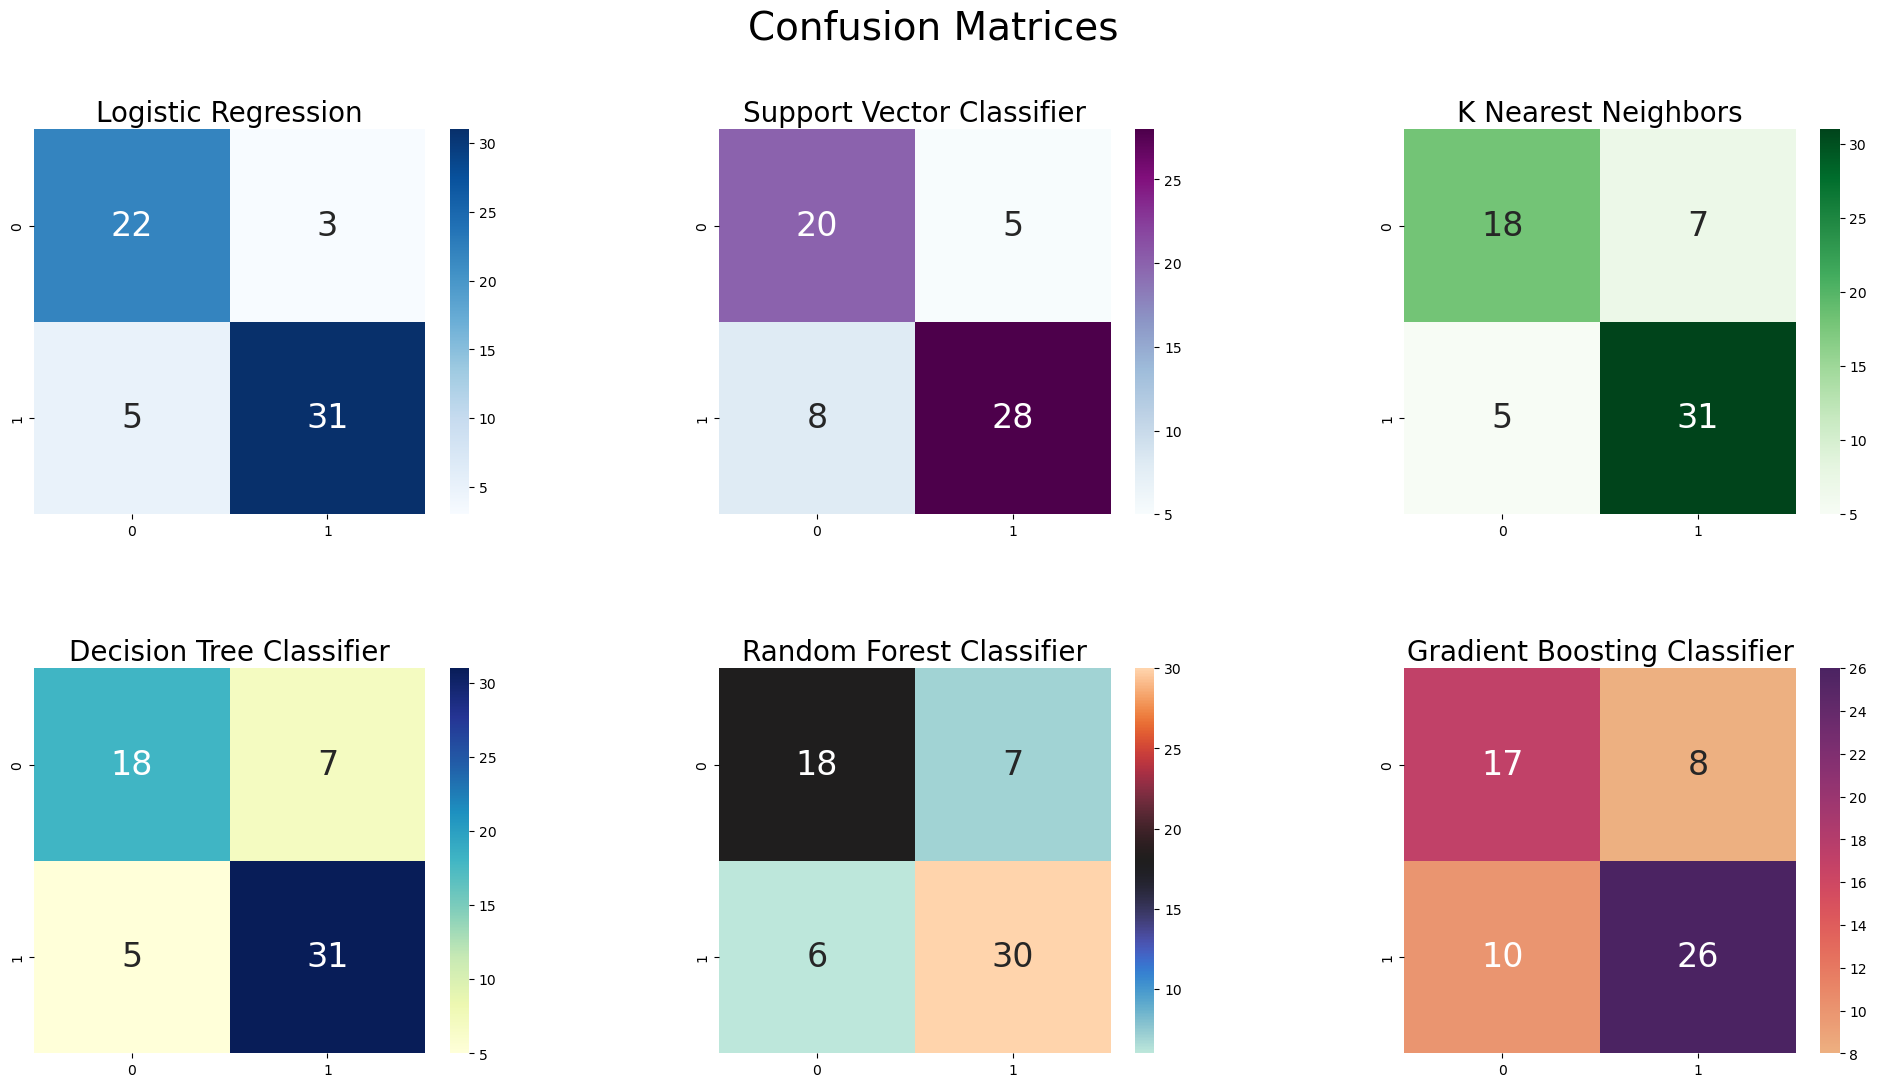

In [44]:
#Plotting confusion matrix for all the algorithms
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrices",fontsize=28)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression",fontsize=20)
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Support Vector Classifier",fontsize=20)
sns.heatmap(cm_svm,annot=True,cmap="BuPu",fmt="d",cbar=True, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("K Nearest Neighbors",fontsize=20)
sns.heatmap(cm_knn,annot=True,cmap="Greens",fmt="d",cbar=True, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Decision Tree Classifier",fontsize=20)
sns.heatmap(cm_dt,annot=True,cmap="YlGnBu",fmt="d",cbar=True, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Random Forest Classifier",fontsize=20)
sns.heatmap(cm_rf,annot=True,cmap="icefire",fmt="d",cbar=True, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Gradient Boosting Classifier",fontsize=20)
sns.heatmap(cm_gb,annot=True,cmap="flare",fmt="d",cbar=True, annot_kws={"size": 24})

plt.show()

# 16. Prediction on New Data

In [45]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,    
},index=[0])

In [46]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [47]:
p = log.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


# 17. Save Model Using Joblib

In [48]:
import joblib
joblib.dump(log,'model_joblib_heart')

['model_joblib_heart']

In [49]:
model = joblib.load('model_joblib_heart')
model.predict(new_data)

array([0], dtype=int64)

In [50]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [51]:
import pickle
filename = 'heart_model.pkl'
pickle.dump(log, open(filename, 'wb'))